In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math, copy

### Computing the cost function (for regressor with one feature)

In [3]:
x = np.array([1.0, 2.0])
y = np.array([300.0, 500.0])

In [4]:
def compute_cost(x, y, w, b):
    total_cost = 0
    for i in range(len(x)):
        equ = w * x[i] + b
        cost = (equ - y[i]) ** 2
        total_cost += cost
    return total_cost / (2 * len(x))

### Computing Gradient descent (for regressor with one feature)

In [5]:
def compute_gradient(x, y, w, b):
    d_wb_w = 0
    d_wb_b = 0
    m = len(x)
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        d_wb_w += dj_dw_i
        d_wb_b += dj_db_i
    d_wb_w = d_wb_w / m
    d_wb_b = d_wb_b / m
    return d_wb_w, d_wb_b


### Calculating Gradient descent for finding optimal values of w and b

In [6]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, compute_cost, compute_gradient):
    w = copy.deepcopy(w_in)
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        b = b - alpha * dj_dw
        w = w - alpha * dj_db
        if i < 100000:  # -> Prevent exhaustion of RAM
            J_history.append(compute_cost(x, y, w, b))
            p_history.append([w,b])
        if i % math.ceil(num_iters /10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e}", f"dj_dw : {dj_dw:0.3e}, dj_db : {dj_db : 0.3e}", f"w : {w : 0.3e}, b : {b:0.5e}")
    return w, b, J_history, p_history # For graphing


In [7]:
w_init = 0
b_init = 0
iterations = 10000
tmp_alpha = 1.0e-2
w_final, b_final, J_history, p_history = gradient_descent(x, y, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print("w -> ", w_final, "b_final ->", b_final)

Iteration    0: Cost 7.99e+04 dj_dw : -6.500e+02, dj_db : -4.000e+02 w :  4.000e+00, b : 6.50000e+00
Iteration 1000: Cost 3.04e+03 dj_dw : -1.974e+01, dj_db :  1.248e+01 w :  4.601e+01, b : 3.43485e+02
Iteration 2000: Cost 1.54e+04 dj_dw : -4.442e+01, dj_db :  2.809e+01 w : -1.465e+02, b : 6.47912e+02
Iteration 3000: Cost 7.80e+04 dj_dw : -9.996e+01, dj_db :  6.322e+01 w : -5.798e+02, b : 1.33296e+03
Iteration 4000: Cost 3.95e+05 dj_dw : -2.249e+02, dj_db :  1.423e+02 w : -1.555e+03, b : 2.87452e+03
Iteration 5000: Cost 2.00e+06 dj_dw : -5.062e+02, dj_db :  3.201e+02 w : -3.749e+03, b : 6.34348e+03
Iteration 6000: Cost 1.01e+07 dj_dw : -1.139e+03, dj_db :  7.204e+02 w : -8.686e+03, b : 1.41496e+04
Iteration 7000: Cost 5.13e+07 dj_dw : -2.563e+03, dj_db :  1.621e+03 w : -1.980e+04, b : 3.17158e+04
Iteration 8000: Cost 2.60e+08 dj_dw : -5.768e+03, dj_db :  3.648e+03 w : -4.480e+04, b : 7.12447e+04
Iteration 9000: Cost 1.32e+09 dj_dw : -1.298e+04, dj_db :  8.209e+03 w : -1.011e+05, b : 1.

In [8]:
df = pd.read_csv('Housing.csv')

In [9]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Scaling the Features between 0 and 1

In [10]:
price = df['price'] / df['price'].max()
area = df['area'] / df['area'].max()

In [11]:
price

0      1.000000
1      0.921053
2      0.921053
3      0.918421
4      0.857895
         ...   
540    0.136842
541    0.132868
542    0.131579
543    0.131579
544    0.131579
Name: price, Length: 545, dtype: float64

In [12]:
area

0      0.458025
1      0.553086
2      0.614815
3      0.462963
4      0.458025
         ...   
540    0.185185
541    0.148148
542    0.223457
543    0.179630
544    0.237654
Name: area, Length: 545, dtype: float64

In [13]:
w, b, J_history, p_history = gradient_descent(area, price, 0, 0, 0.003, 9000, compute_cost, compute_gradient)

Iteration    0: Cost 7.38e-02 dj_dw : -1.240e-01, dj_db : -3.584e-01 w :  1.075e-03, b : 3.72082e-04


KeyboardInterrupt: 

In [ ]:
w, b

(0.5187770090477928, 0.19465052980221892)

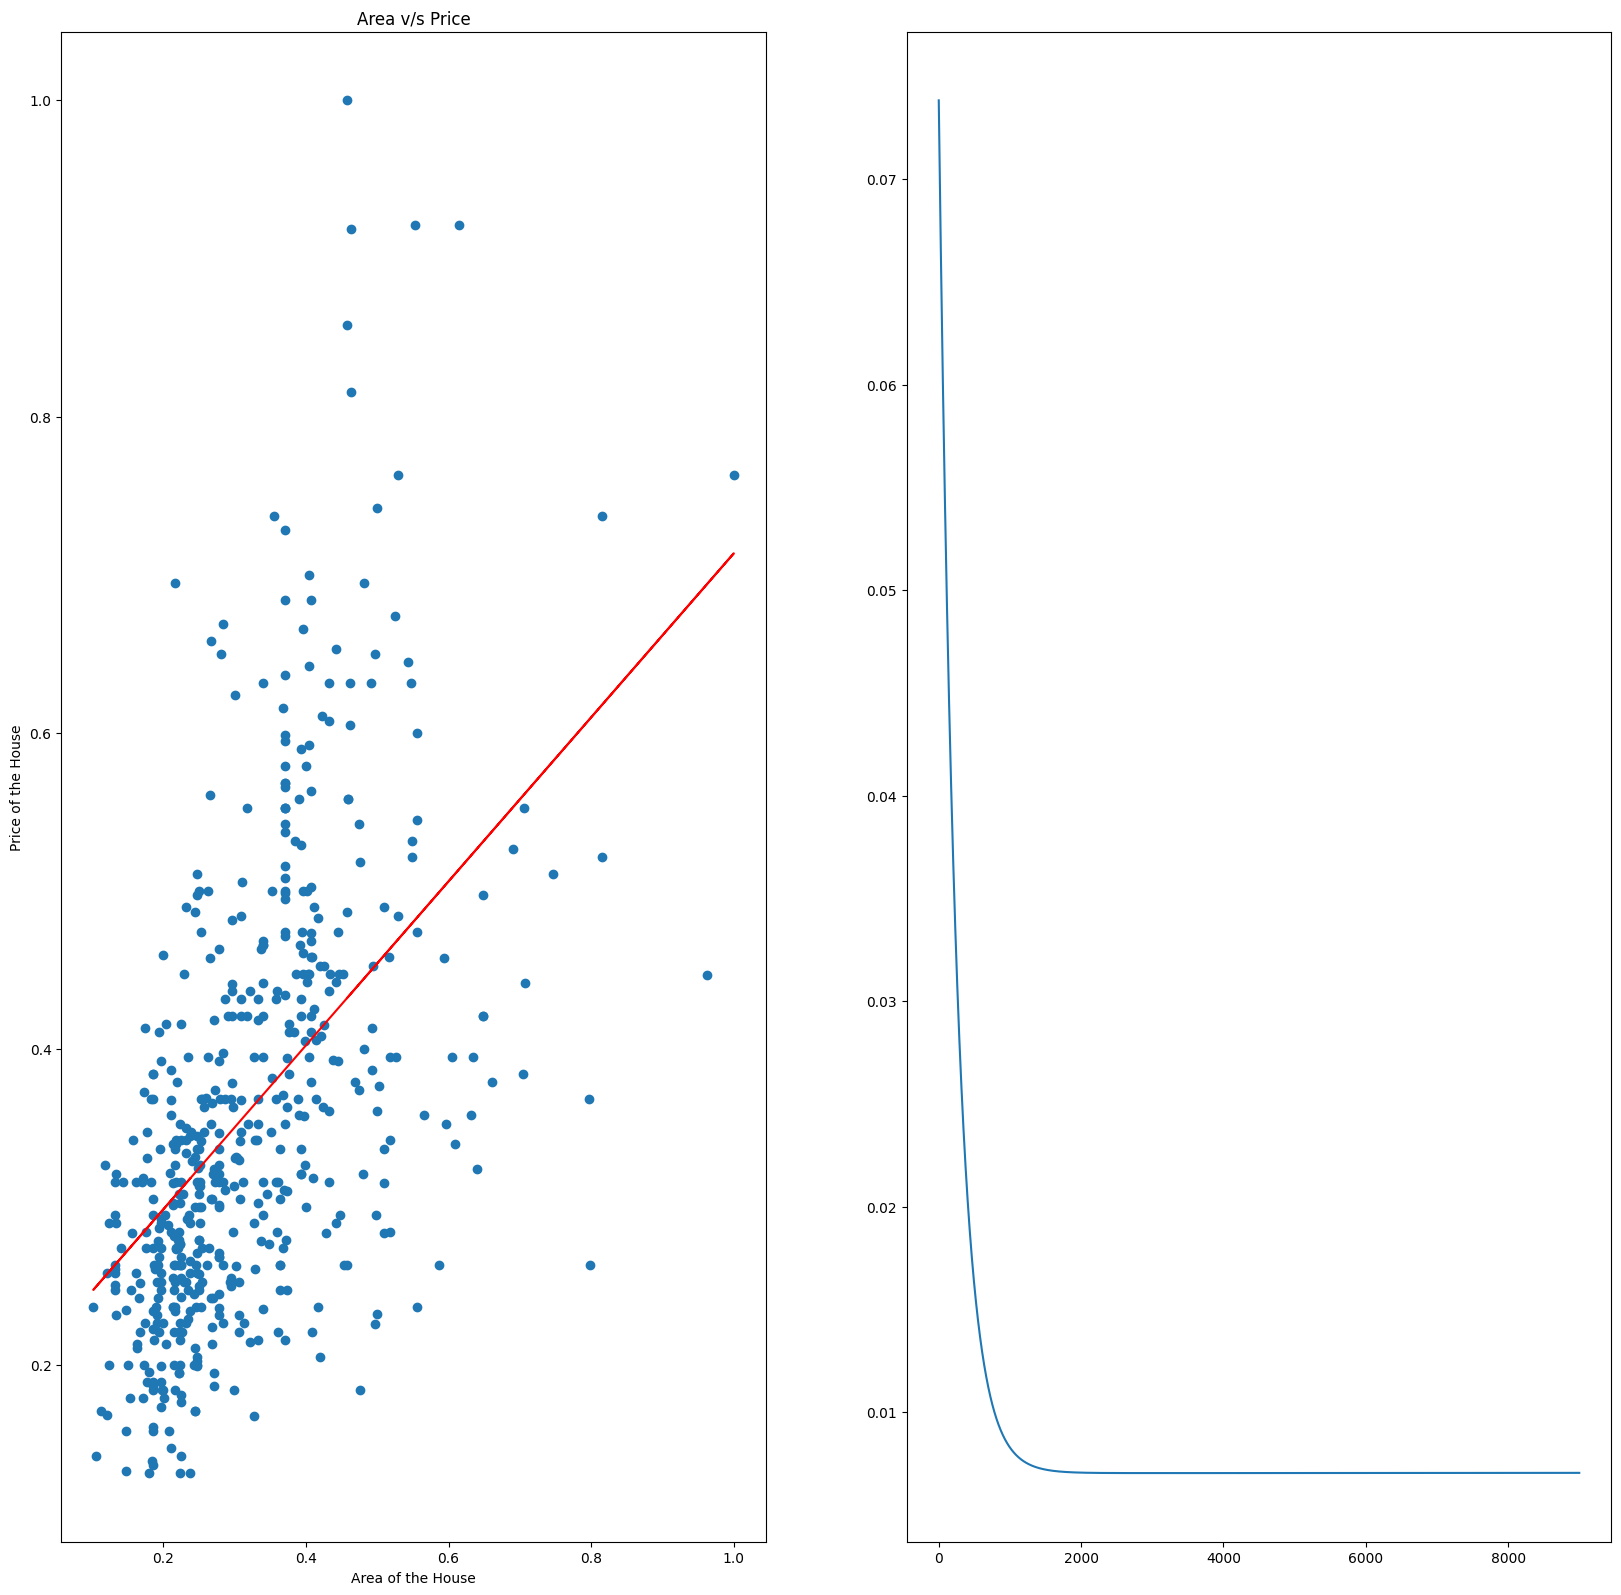

In [ ]:
fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = (20, 20), dpi = 100)
axes1 = axes[0]
axes2 = axes[1]
axes1.scatter(area, price)
axes1.plot(area, w * area + b, color = 'red')
axes1.set_xlabel("Area of the House")
axes1.set_ylabel("Price of the House")
axes1.set_title('Area v/s Price')

axes2.plot(np.arange(0, len(J_history)), J_history)

# fig.subplots_adjust(hspace = 5, wspace = 10)


In [ ]:
w * 0.4 + b

0.40216133342133603

### Multiple Linear Regression

### Cost function for multiple Linear Regression

In [80]:
np.longdouble

numpy.longdouble

In [86]:
def mcompute_cost(X, y, w, b):
    cost = 0
    m, n = X.shape
    for i in range(m):
        f_wb_i = np.dot(X.iloc[i], w) + b
        cost_function = np.longdouble(f_wb_i - y.iloc[i]) ** 2
        cost += cost_function
    return cost / (2 * m)


### Compute Gradient Descent with Multiple Variables

In [87]:
def mcompute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros(n, dtype = 'double')
    dj_db = 0
    for i in range(m):
        err = np.dot(X.iloc[i], w) + b - y.iloc[i]
        for j in range(n):
            dj_dw[j] = np.longdouble((dj_dw[j] + err) * X.iloc[i][j])
        dj_db = np.longdouble(dj_db + err)
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

### Gradient Descent of multiple variables for finding optimal w and b

In [88]:
def mgradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, y, w, b)
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)
        if i < 100000:
            J_history.append(cost_function(X, y, w, b))
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
    return w, b, J_history



### Testing Multiple Linear Regression

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Scaling the Features between 0 and 1

In [ ]:
area = df['area'] / df['area'].max()
bedrooms = df['bedrooms'] / df['bedrooms'].max()
stories = df['stories']  / df['stories'].max()

X = pd.concat([area, bedrooms, stories], axis = 1)
y = df['price']


In [ ]:
m, n = X.shape

In [ ]:
m

545

In [ ]:
w_in = np.zeros(3)
b_in = 0
alpha = 0.01
w, b, J_history = mgradient_descent(X, y, w_in, b_in, mcompute_cost, mcompute_gradient, alpha, 1000)

Iteration    0: Cost 12880701086966.14   
Iteration  100: Cost 3238323507907.94   
Iteration  200: Cost 1948038298848.21   
Iteration  300: Cost 1775517441892.45   
Iteration  400: Cost 1753102681713.54   
Iteration  500: Cost 1751034598387.87   
Iteration  600: Cost 1751793871445.24   
Iteration  700: Cost 1752971801983.59   
Iteration  800: Cost 1754221547454.46   
Iteration  900: Cost 1755487597892.93   


In [ ]:
w, b

(array([-13574.7728869 , -41723.16352197, -31035.08886227]), 4800843.901180688)

Text(0, 0.5, 'J(w)')

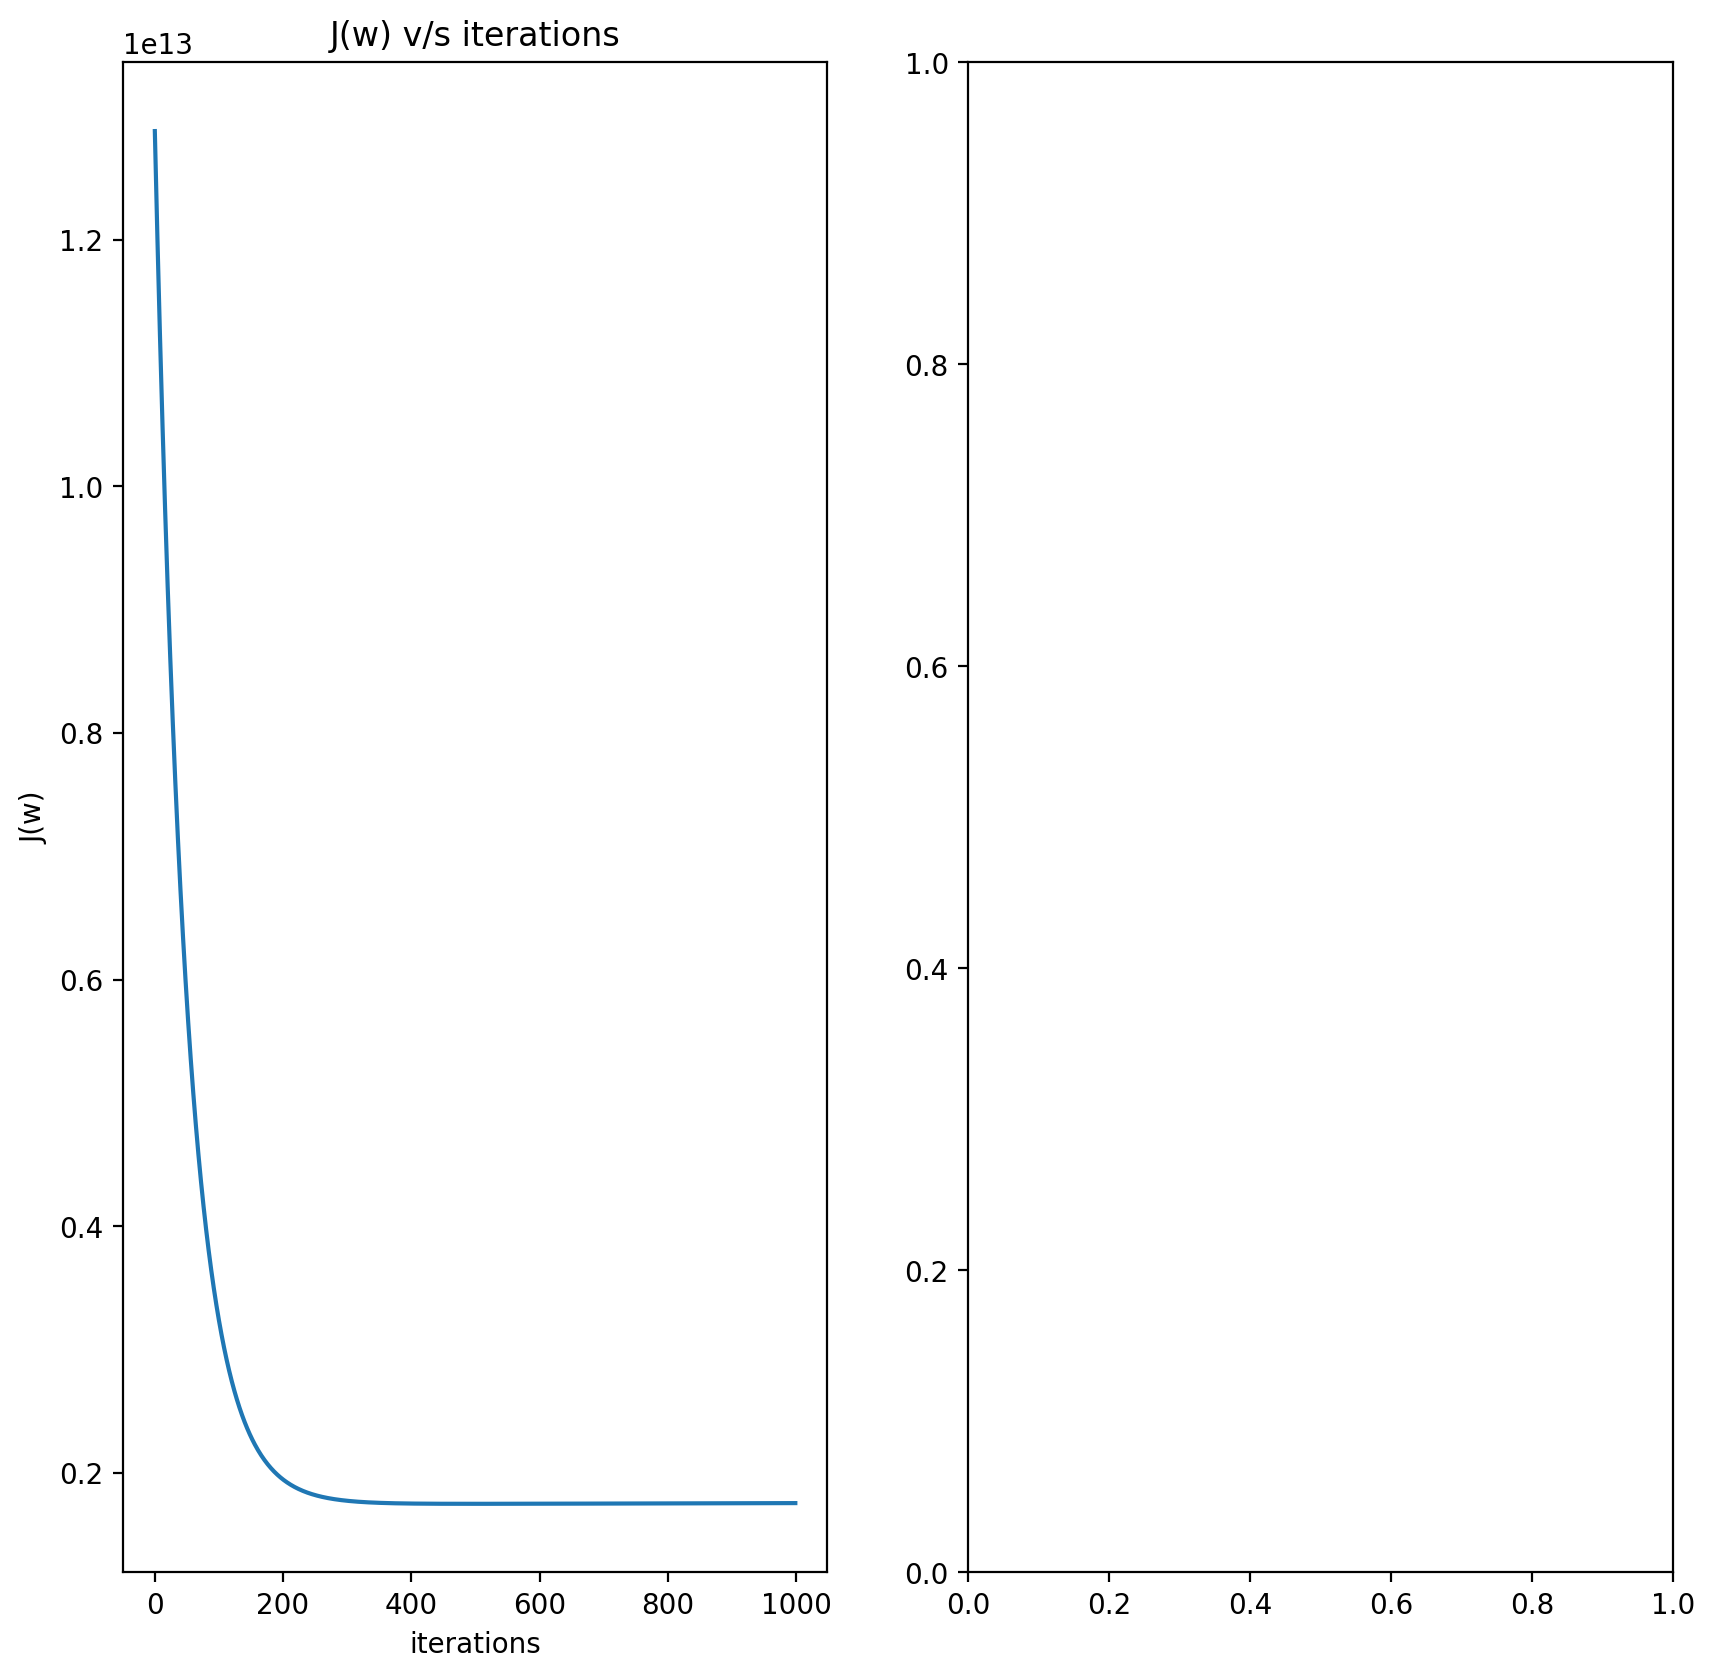

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 10), dpi = 200)
#axes[0].plot(X, w[0] * X['area'] + w[1] * X['bedrooms'] + w[2] * X['stories'] + b)
axes[0].plot(np.arange(0, len(J_history)), J_history)
axes[0].set_title('J(w) v/s iterations')
axes[0].set_xlabel('iterations')
axes[0].set_ylabel('J(w)')



## Logistic Regression

- Compute cost Function for Logistic Regression

In [54]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

In [64]:
sigmoid(np.dot(np.arange(0, 2) , np.arange(0, 2)) + 3)

0.9820137900379085

In [148]:
def lcompute_cost(X, y, w, b):
    m, n = X.shape
    cost = 0
    for i in range(m):
        f_x = sigmoid(np.dot(X.iloc[i], w) + b)
        cost += -1 * y.iloc[i] * np.log(f_x) - (1 - y.iloc[i]) * np.log(1 - f_x)
    cost = cost / m
    return cost


In [143]:
def lcompute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    for i in range(m):
        err = sigmoid(np.dot(X.iloc[i], w) + b) 
        err = err - y.iloc[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X.iloc[i][j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db
    


In [144]:
def lgradient_descent(X, y, w_in, b_in, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = lcompute_gradient(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i < 100000:
            J_history.append(lcompute_cost(X, y, w, b))
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}")
    return w, b, J_history

In [120]:
df1 = pd.read_csv('gender_submission.csv')

In [121]:
df1.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [117]:
df2 = pd.read_csv('test.csv')

In [20]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [119]:
test = df2[['Age', 'Ticket']]

In [123]:
test = pd.concat([test, df1['Survived']], axis = 1)

In [126]:
test = test.dropna()

In [130]:
test = test[test['Ticket'].str.isnumeric()]

In [131]:
test['Ticket'] = test['Ticket'].apply(lambda x : float(x))

In [132]:
test['Ticket']

0       330911.0
1       363272.0
2       240276.0
3       315154.0
4      3101298.0
         ...    
404      17765.0
406      28666.0
407     113503.0
411      19928.0
412     347086.0
Name: Ticket, Length: 232, dtype: float64

In [133]:
test['Ticket'] = test['Ticket'] / test['Ticket'].max()

In [134]:
test['Age'] = test['Age'] / test['Age'].max()

In [135]:
X = test[['Ticket', 'Age']]

In [137]:
y = test['Survived']

In [140]:
y.count(), X.count()

(232,
 Ticket    232
 Age       232
 dtype: int64)

In [147]:
y.iloc[9]

0

In [149]:
w = np.zeros(2)
w, b, J_history = lgradient_descent(X['Age'], y, w, 0, 0.1, 1000)

Iteration    0: Cost 0.6909738364957086
Iteration  100: Cost 0.6548207467650546
Iteration  200: Cost 0.6545042715468415
Iteration  300: Cost 0.6543308864727755
Iteration  400: Cost 0.6541705501107536
Iteration  500: Cost 0.6540218828205759
Iteration  600: Cost 0.653884087761898
Iteration  700: Cost 0.6537564144841549
Iteration  800: Cost 0.653638155958621
Iteration  900: Cost 0.6535286475208453


In [159]:
J_history

[0.6909738364957086,
 0.6889253500518592,
 0.6869945232997724,
 0.6851745617589673,
 0.6834590542460054,
 0.6818419533354672,
 0.6803175564776076,
 0.6788804878046276,
 0.6775256806467044,
 0.6762483607696627,
 0.6750440303384323,
 0.6739084526039091,
 0.6728376373054814,
 0.6718278267770895,
 0.6708754827411496,
 0.6699772737719027,
 0.6691300634075951,
 0.6683308988893064,
 0.6675770005031102,
 0.6668657515015411,
 0.6661946885799072,
 0.6655614928829124,
 0.6649639815171079,
 0.6644000995450503,
 0.6638679124374147,
 0.6633655989599432,
 0.662891444472721,
 0.6624438346200187,
 0.662021249389715,
 0.6616222575221237,
 0.6612455112488836,
 0.6608897413434256,
 0.6605537524653491,
 0.660236418781911,
 0.6599366798506362,
 0.6596535367478684,
 0.6593860484288695,
 0.6591333283058486,
 0.6588945410310068,
 0.6586688994724355,
 0.6584556618713402,
 0.6582541291697505,
 0.6580636424984644,
 0.6578835808155903,
 0.6577133586866002,
 0.6575524241973403,
 0.6574002569919523,
 0.6572563664281

In [150]:
w

array([ 0.32704674, -0.10281763])

In [151]:
b

-0.5479344095070264

In [152]:
X.head()

,Ticket,Age
0,0.106701,0.453947
1,0.117135,0.618421
2,0.077476,0.815789
3,0.101620,0.355263
4,1.000000,0.289474


In [153]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [160]:
for i in range(len(X)):
    if sigmoid(np.dot(np.array([w[0], w[1]]), np.array([X.iloc[i][0], X.iloc[i][1]])) + b) >= 0.5:
        print(sigmoid(np.dot(np.array([w[0], w[1]]), np.array([X.iloc[i][0], X.iloc[i][1]])) + b))


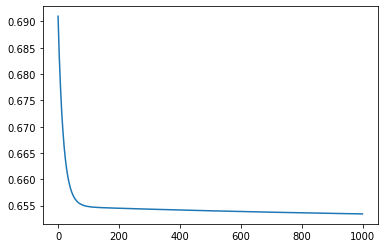

In [158]:
plt.plot(np.arange(0, len(J_history)), J_history)

Scikit-Learn
General Syntax for importing
```python:
from sklearn.model_family import ModelAlgo
mymodel = ModelAlgo(param1, param2)
mymodel.fit(X_train, y_train)
predictions = mymodel.predict(X_test)
----
from sklearn.metrics import error_metric
performance = error_metric(y_test, predictions)


In [6]:
df = pd.read_csv('Advertising.csv')

In [7]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


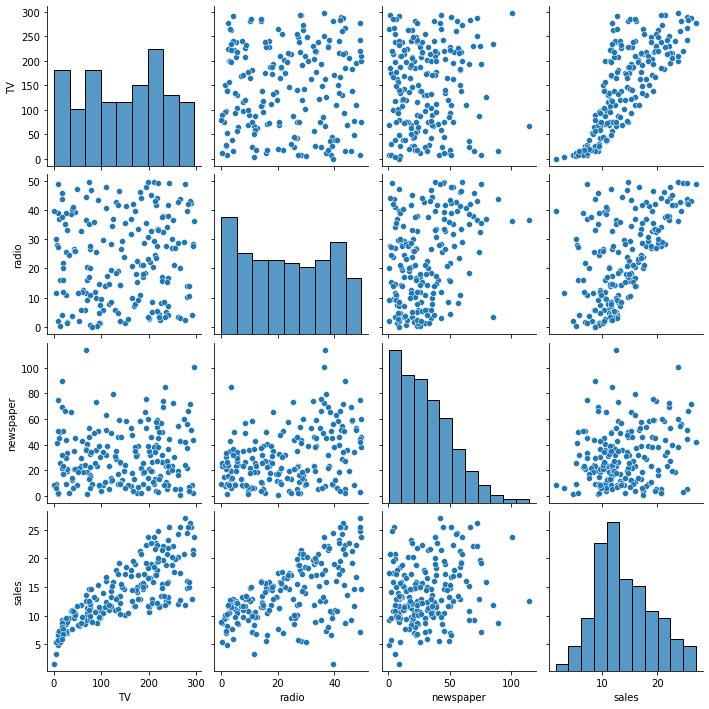

In [8]:
sns.pairplot(data = df)

In [10]:
X = df.drop('sales', axis = 1)

In [11]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [12]:
y = df['sales']

In [13]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

In [16]:
# Creating a Estimator
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [18]:
model.fit(X_train, y_train)

LinearRegression()

### Evaluating Regression
- Most common evaluation metrics for regression
    - Mean Absolute Error
        - This is the mean of the absolute value of error
        - Summation -> | y (Real Value) - yhat (Predicted Value) | / n
    - Mean Squared Error
        - Larger error are "punished" more than MAE, making MSE more popular
        - Summation -> (y - yhat) ^ 2 / n
        - Issue with MSE -> It reports units of y squared metre to metre square
    - Root Mean Square Error
        - Just take root of *Mean Squared Error*
- A RMSE of $10 is fantastic for predicting the price of a house, but horrible for predicting the price of a candy bar

In [19]:
test_predictions = model.predict(X_test)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
df['sales'].mean()

14.0225

<AxesSubplot:xlabel='sales', ylabel='Count'>

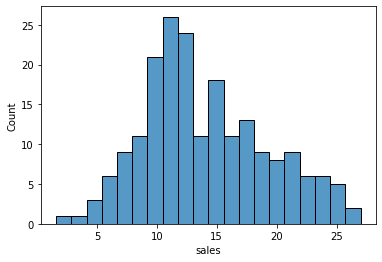

In [22]:
sns.histplot(data = df, x = 'sales', bins = 20)

In [23]:
# MAE
mean_absolute_error(y_test, test_predictions)

1.213745773614481

In [24]:
# RMSE
np.sqrt(mean_squared_error(y_test, test_predictions))

1.5161519375993884

### Residual Plots
- Check if linear regression is a good model or not
- The residual errors should be random and close to a normal distribution
- Normal distirbution centered at zero makes sense because we want maximum points to be centered at zero

In [25]:
test_residuals = y_test - test_predictions

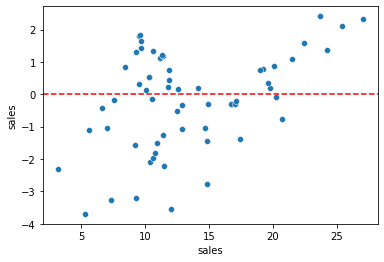

In [28]:
sns.scatterplot(x = y_test, y = test_residuals)
plt.axhline(y = 0, color = 'red', ls = '--')
# The graph below should look random rather than indicating a straight line or a parabola
# If it is a straight line it means only one point is at the point where y = 0 and we dont want that
# We want maximum points to be at y = 0

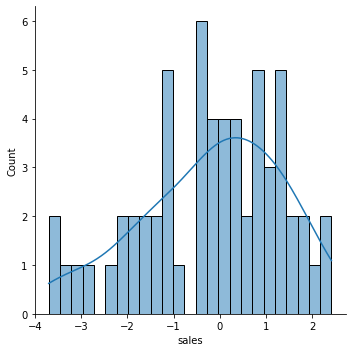

In [29]:
sns.displot(test_residuals, bins = 25, kde = True)

In [30]:
import scipy as sp

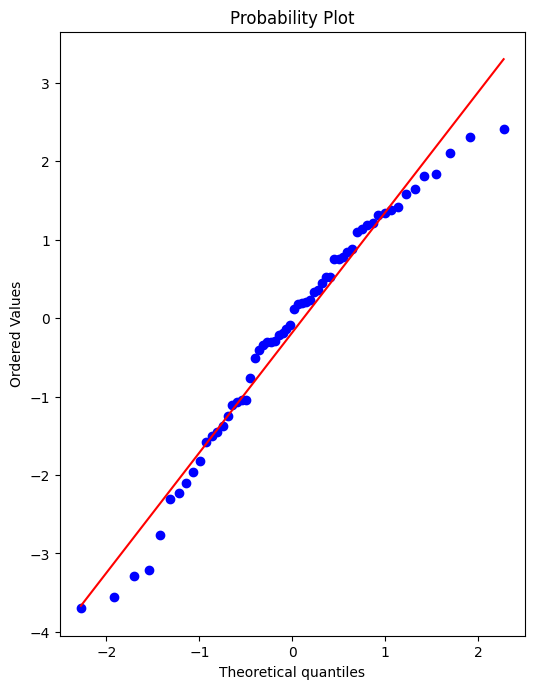

In [33]:
fig, ax = plt.subplots(figsize = (6, 8), dpi = 100)
_ = sp.stats.probplot(test_residuals, plot = ax)
# The red line below indicates how a normal distribution plot should look like
# The more diverjed the blue dots are from the red line more your model is wrong or is not 
# suitable for that dataset

In [34]:
final_model = LinearRegression()

In [35]:
final_model.fit(X, y)

LinearRegression()

# Get the Beta Coefficient from Scikit Learn 

In [37]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [38]:
y_hat = final_model.predict(X)

Text(0, 0.5, 'Sales')

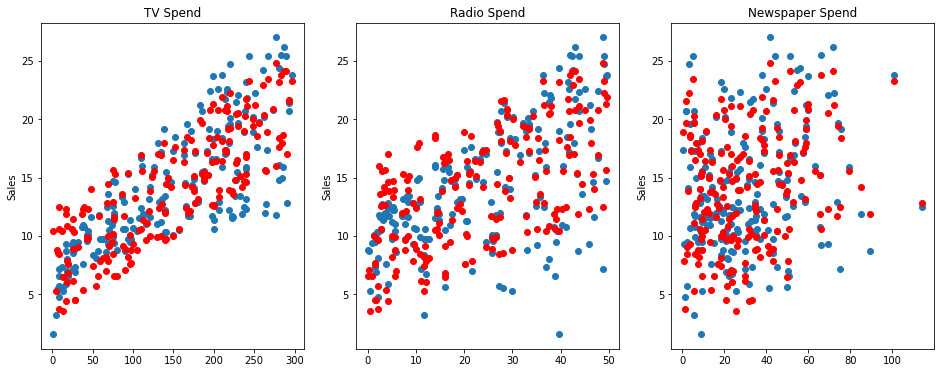

In [39]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 6))
axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].plot(df['TV'], y_hat, 'o', color = 'red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].plot(df['radio'], y_hat, 'o', color = 'red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].plot(df['newspaper'], y_hat, 'o', color = 'red')
axes[2].set_title("Newspaper Spend")
axes[2].set_ylabel("Sales")

In [40]:
from joblib import dump, load

In [41]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [42]:
loaded_model = load('final_sales_model.joblib')

In [43]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [44]:
X.shape

(200, 3)

In [45]:
#149 TV, 22 Radio, 12 Newsaper
# Sales ?
campaign = [[149, 22, 12]]

In [46]:
loaded_model.predict(campaign)

c:\Users\Shreyash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])